# CAR SUPER-RESOLUTIONIZER IN KERAS
### Using Convolutional Layers

In [136]:
%matplotlib inline
import re
import numpy
import os
from scipy.ndimage.filters import gaussian_filter

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))



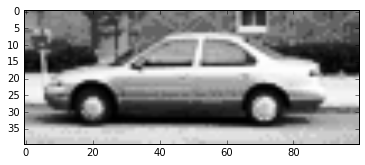

In [10]:
if __name__ == "__main__":
    from matplotlib import pyplot
    image = read_pgm("C:\\Users\\Max.Polaczuk\\Downloads\\CarData\\CarData\\TrainImages\\pos-5.pgm", byteorder='<')
    pyplot.imshow(image, pyplot.cm.gray)
    pyplot.show()

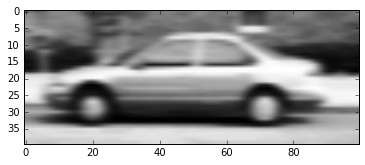

In [159]:
''' 
create the training data 

basically just add a bunch of gaussian blur to the training images...

one thing to consider is that i may need to use square images
'''

ima = 1*image

for i in range(len(image)):
    #ima[i] = image[i]- np.sin(np.mean(image[i])) - np.max(np.random.normal(1,15), 0 ) 
    ima[i] = gaussian_filter(image[i],sigma = 1.5)
    
pyplot.imshow(ima, pyplot.cm.gray)
pyplot.show()

In [167]:
def input_creator(img):
    ''' takes input picture and adds some noise to it '''
    ima = 1*image
    for i in range(len(image)):
        ima[i] = gaussian_filter(image[i],sigma = 1.5)
        
    return(ima)

In [138]:
''' show all image files under the '''

directory = 'C:\\Users\\Max.Polaczuk\\Downloads\\CarData\\CarData\\TrainImages'
for filename in os.listdir(directory):
    if filename.endswith(".pgm") or filename.endswith(".py"): 
        print(os.path.join(directory, filename))
        continue
    else:
        continue

C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-0.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-1.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-10.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-100.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-101.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-102.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-103.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-104.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-105.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-106.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-107.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-108.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-109.pgm
C:\Users\Max.Polaczuk\Downloads\CarData\CarData\TrainImages\neg-11.pg

In [ ]:
''' the general algorithm'''

# > for each image file in directory...

# load in input data 
# save copy -- append to data frame "Target"
# transform it into input_creator
# append to data frame "Inputs"

# training data complete...

In [173]:
directory = 'C:\\Users\\Max.Polaczuk\\Downloads\\CarData\\CarData\\TrainImages'
count = 0
for filename in os.listdir(directory):
    if filename.endswith(".pgm") or filename.endswith(".py"): 
        img =read_pgm(os.path.join(directory, filename), byteorder='<') 
        
        if count == 0:
            # first time - initialize the arrays...
            inputs =np.reshape(  input_creator(img), (1,40,100,1) )
            targets = np.reshape( img, (1,40,100,1) )
            count +=1
        else:
            # there has been more times... - append the arrays
            
            inputs = np.concatenate( (inputs , np.reshape( input_creator(img) ,(1,40,100,1) )), axis=0)
            
            targets =  np.concatenate( (targets , np.reshape(img,(1,40,100,1) )), axis=0)
            
        
        continue
    else:
        continue

In [174]:
print(inputs.shape == targets.shape)
print(inputs.shape)

# good the shapes are correct

True
(1050, 40, 100, 1)


Now we can train a conv net that will hopefully learn how the image should look

In [218]:
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Activation, MaxPooling2D, Flatten, Dropout
from keras.callbacks import History 
history = History()

In [235]:
loss = [] # define this cos yolo

In [180]:
# now make the conv net...
model = Sequential()
model.add(Convolution2D(50, 5, 5, border_mode='same', activation = 'relu',input_shape=( 40, 100,1)))
model.add(Convolution2D(50, 4, 4,activation = 'relu', border_mode='same'))
model.add(Convolution2D(1, 3, 3,activation = 'relu', border_mode='same'))
model.compile(optimizer = 'rmsprop', loss = 'mse')


In [ ]:
hist = model.fit(x= inputs, y = targets, nb_epoch = 1, batch_size = 10,callbacks=[history])
loss.append(hist.history['loss'][0])
print(loss)

Epoch 1/1
 990/1050 [===========================>..] - ETA: 2s - loss: 5662.5994

Damn this training speed is aids, need to get on me linux 420 blaze it fgt rekt

In [232]:
pred = model.predict(inputs)

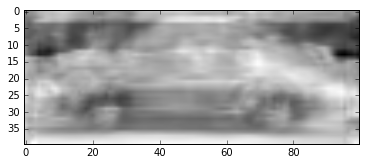

In [233]:
''' view these predictions... '''
pyplot.imshow(np.reshape(pred[0],(40,100)), pyplot.cm.gray)
pyplot.show()


That prediction looks like pure shit at this stage